# Simple Linear Regression

[Linear regression](https://en.wikipedia.org/wiki/Linear_regression) is perhaps the most simple of all of the models. Do you remember the linear formula where `m` is the slope and `b` is where the line starts on the y-axis?

$$y=mx+b$$

This is a simple linear model since there is only one coefficient - `mx`.

## Imports and load data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import mlflow
import mlflow.sklearn
sns.set()
%matplotlib inline

In [2]:
data_ver = 2
model_ver = 2
mlflow.start_run() 

<ActiveRun: >

In [3]:
mlflow.log_param("data_ver", data_ver)
mlflow.log_param("model_ver", model_ver)

df = pd.read_csv("../data/SalaryData%s.csv" % data_ver)

In [4]:
df.head()

,Name,YearsExperience,Salary
0,Emillie Hodson,0.5,25431.0
1,Madelyn Farrell,0.8,31431.0
2,Varun Field,1.1,39343.0
3,Shayan Guy,1.3,46205.0
4,Darius Emery,1.5,37731.0


In [5]:
df.shape
df.drop(["Name"], axis = 1, inplace=True)

Before continuing, check if there are any missing data in the data set.

In [6]:
df.isnull().values.any()

False

## Split data

Splitting the depedent variable (`Salary`) out from the indepedent variable (`YearsExperience`) so we can build our model.

We use the `train_test_split` method from `scikit-learn` to split our data. The `test_size` is used to tell it what percentage of the data to use for our testing data set and the `random_state` is used as a seed for the random splitting of the data. The seed will randomize the split in the same way each time for reproducability.

In [7]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
df_copy = train_set.copy()
df_copy.head()

,YearsExperience,Salary
12,3.9,63218.0
8,3.0,60150.0
16,4.1,57081.0
9,3.2,54445.0
33,10.3,122391.0


## Exploratory Data Analysis

Explore the data to find trends. Using the `describe` method to get descriptive statistics on numerical columns of our data. The `corr` method to calculate correlations between the columns of our data. And plotting with `matplotlib` via the `plot` method to get a visual of the data. Also using `seaborn`'s `regplot` to give us what a linear regression line of our data may look like and to verify that our data looks linear.

In [8]:
df_copy.describe()

,YearsExperience,Salary
count,28.000000,28.000000
mean,4.896429,72354.500000
std,3.109541,30206.723766
min,0.500000,25431.000000
25%,2.725000,52385.000000
50%,4.150000,62164.500000
75%,7.375000,100100.250000
max,10.500000,122391.000000


In [9]:
df_copy.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.981946
Salary,0.981946,1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

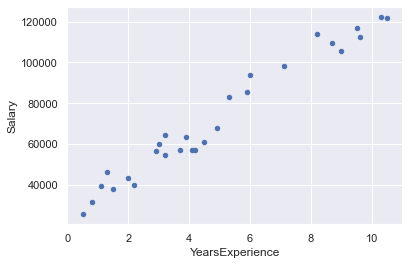

In [10]:
df_copy.plot.scatter(x='YearsExperience', y='Salary')

/Users/anllogui/miniconda3/envs/master_ciencia_datos_21/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

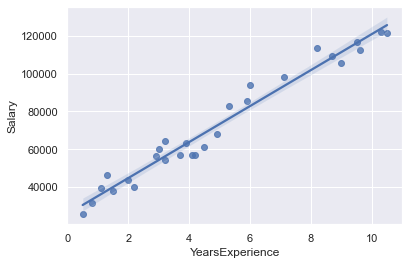

In [11]:
# Regression plot
sns.regplot('YearsExperience', # Horizontal axis
           'Salary', # Vertical axis
           data=df_copy)

## Train

We're making three other data sets for the `LinearRegression` model:
- `test_set` that is just the `YearsExperience` column (dropping the `Salary` column) that will be used for analyzing and scoring our model.
- `train_labels` that is just the `Salary` column to train the `LinearRegression` model what the answers are when passing in the years of experience input.
- `train_set` that is also just the `YearsExperience` column (dropping the `Salary` column) that will be passed into the `LinearRegression`'s `fit` method as the `x` parameter.

In [12]:
test_set_full = test_set.copy()

test_set = test_set.drop(["Salary"], axis=1)

In [13]:
test_set.head()

,YearsExperience
26,7.9
13,4.0
24,6.8
21,5.9
15,4.0


In [14]:
train_labels = train_set["Salary"]
train_set_full = train_set.copy()
train_set = train_set.drop(["Salary"], axis=1)
train_set.head()

,YearsExperience
12,3.9
8,3.0
16,4.1
9,3.2
33,10.3


Now that we have our data in the correct form, we pass in the `train_set` and `train_labels` into the `fit` method to train the model.

In [15]:
lin_reg = LinearRegression()

lin_reg.fit(train_set, train_labels)

LinearRegression()

Now we have a model and can call the `predict` function on it with inputs. 

In [16]:
salary_pred = lin_reg.predict(test_set)
salary_pred

array([101005.04699485,  63803.62331069,  90512.3377506 ,  81927.39382349,
        63803.62331069, 110543.87358053,  74296.33255494])

## Analyze Results

We can get the coefficients and intercept from our model.

In [17]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

mlflow.log_metric("coef", float(lin_reg.coef_))
mlflow.log_metric("intercept", float(lin_reg.intercept_))

Coefficients:  [9538.82658568]
Intercept:  25648.316967968298


With that information we can build our line formula - $y=9423.81532303x + 25321.5830118$

We can compare our predictions to our testing set label columns.

In [18]:
print(salary_pred)
print(test_set_full["Salary"])

[101005.04699485  63803.62331069  90512.3377506   81927.39382349
  63803.62331069 110543.87358053  74296.33255494]
26    101302.0
13     55794.0
24     91738.0
21     81363.0
15     56957.0
29    119431.0
19     66029.0
Name: Salary, dtype: float64


Models in `scikit-learn` have a `score` method. Depending on the model, this method will do a different calculation. For `LinearRegression` it calculates the $r^2$.

In [19]:
lin_reg.score(test_set, test_set_full["Salary"])

0.9242872516998699

There's also a separate `r2_score` method that will calculate the $r^2$.

In [20]:
score = r2_score(test_set_full["Salary"], salary_pred)
mlflow.log_metric("score", score)
print(score)


0.9242872516998699


We can also plot our test data as a scatter plot and, with our predicted salary that we got from our model, plot a line to see how well it fits the data.

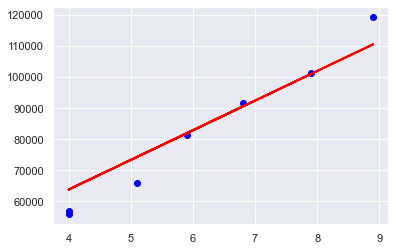

In [21]:
plt.scatter(test_set_full["YearsExperience"], test_set_full["Salary"], color='blue')
plt.plot(test_set_full["YearsExperience"], salary_pred, color='red', linewidth=2)

## Export 

In [22]:
print(mlflow.get_artifact_uri())



file:///./0/4e0371b2402b46e98b13e77c1e6a2930/artifacts


In [23]:
from urllib.parse import urlparse

tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

# Model registry does not work with file store
if tracking_url_type_store != "file":

    # Register the model
    # There are other ways to use the Model Registry, which depends on the use case,
    # please refer to the doc for more information:
    # https://mlflow.org/docs/latest/model-registry.html#api-workflow
    mlflow.sklearn.log_model(lin_reg, "model", registered_model_name="ElasticnetWineModel")
else:
    mlflow.sklearn.log_model(lin_reg, "model")
    
mlflow.end_run()

OSError: [Errno 30] Read-only file system: '/./0'

In [ ]:
import joblib
joblib.dump(lin_reg, "../../models/linear_regression_model.pkl")
